# CVX Project
# Mahyar Ghazanfari 98102057
# Ardalan Gerami 99102112

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import cvxpy as cvx

# Part 3:

# Q1:

In [30]:
# Defining variables along with their dimensions:

n = 10
m = 100

A = np.random.normal(0,1,size = (m,n))          # A includes Zi's
B = np.random.normal(0,1,size = (m))


In [31]:
# function below calculates objective function's values (f(x)):

def obj_func(x, A, B):
    sum = 0 
    for j in range(m):
        sum += np.abs((A[j,:] @ x - B[j]))
    
    sum = sum/m    
    
    return sum


In [32]:
# functio below calculates subgradient of the function:

def norm1_subgrad(x):
    
        g = np.zeros_like(x)
        for i in range (x.size):
            if x[i]>0:
                g[i] = 1
            else:
                g[i] = -1
            
        return g

def subgrad(x, A, B):                          # This function gives subgradient of f(x)
    m = B.size
    return 1/m * A.T @ norm1_subgrad(A @ x - B)


optimal X is : 

 [[-0.1667894 ]
 [-0.22008943]
 [ 0.13805849]
 [ 0.09134012]
 [-0.11563373]
 [ 0.04394651]
 [-0.15485976]
 [-0.35966015]
 [-0.04665486]
 [-0.06390327]]

f(x*) = [0.79011531]

f(x0) = [0.85887246]


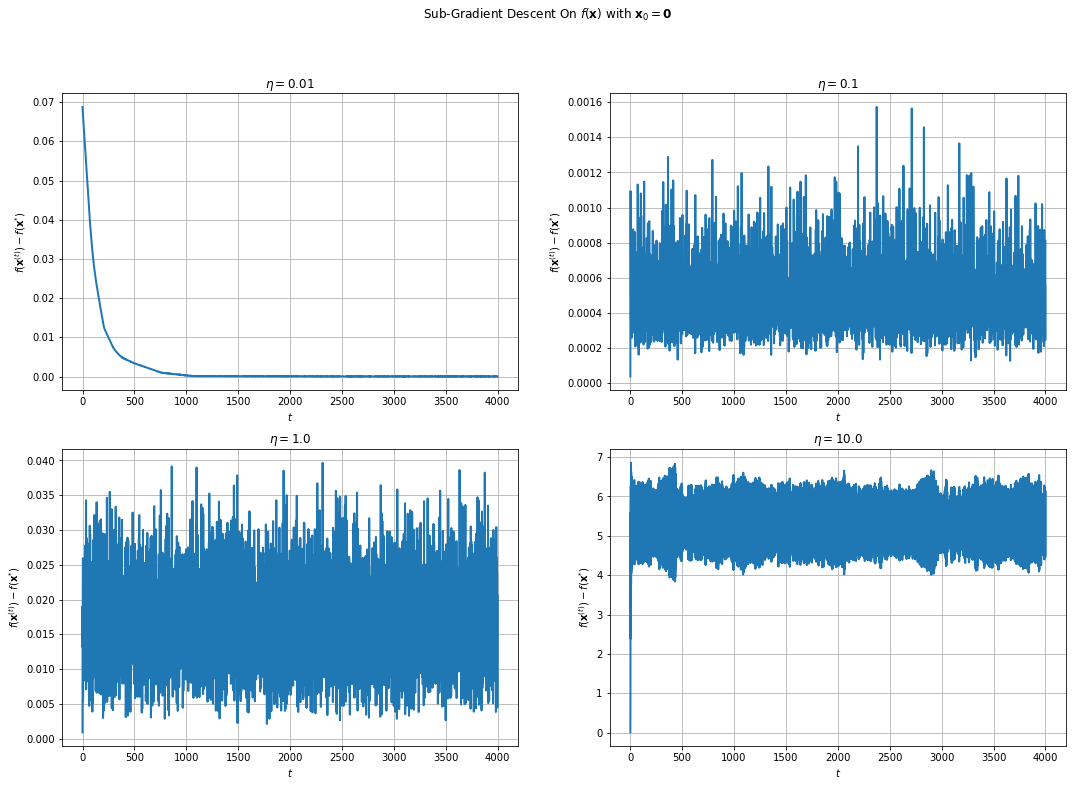

In [33]:
# We use cvx library to find f(x*) which is the global minimum of the convex function:

x = cvx.Variable(n)

cost = cvx.norm1(A@x - B)

prob = cvx.Problem(cvx.Minimize(cost))

prob.solve()
x_opt = x.value                                 # This gives the optimal value
x_opt = x_opt.reshape(10,1)

## f(0) and f(x*) 

f_0 = obj_func(np.zeros((10,1)), A, B)

print('optimal X is : \n\n',x_opt)

print()

print('f(x*) =', obj_func(x_opt, A, B))

print()

print('f(x0) =', f_0)
T  = 4000
x0  = np.zeros(n)
eta = np.array([0.01, 0.1, 1, 10])

# Implementing Sub-Gradient Decent algorithm:

plt.figure(figsize = (18, 12))

for i in range (eta.size):
    x_new = x0
    lst = []
    for j in range(T+1):
        
        diff = obj_func(x_new, A, B)-obj_func(x_opt, A, B)
        lst.append(diff) 
        x_new -= eta[i]*subgrad(x_new, A, B)
        
    plt.subplot(int(np.ceil(np.sqrt(eta.size))), int(np.ceil(np.sqrt(eta.size))), i + 1)
    plt.plot(np.arange(T + 1), lst, linewidth=2)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$f(\mathbf{x}^{(t)}) - f(\mathbf{x}^{*})$')
    plt.title(r'$\eta = ${eta}'.format(eta=eta[i]))
    plt.grid(True)
    
plt.suptitle(r'Sub-Gradient Descent On $f(\mathbf{x})$ with $\mathbf{x}_0 = \mathbf{0}$')
plt.show()            
        

# Q2:

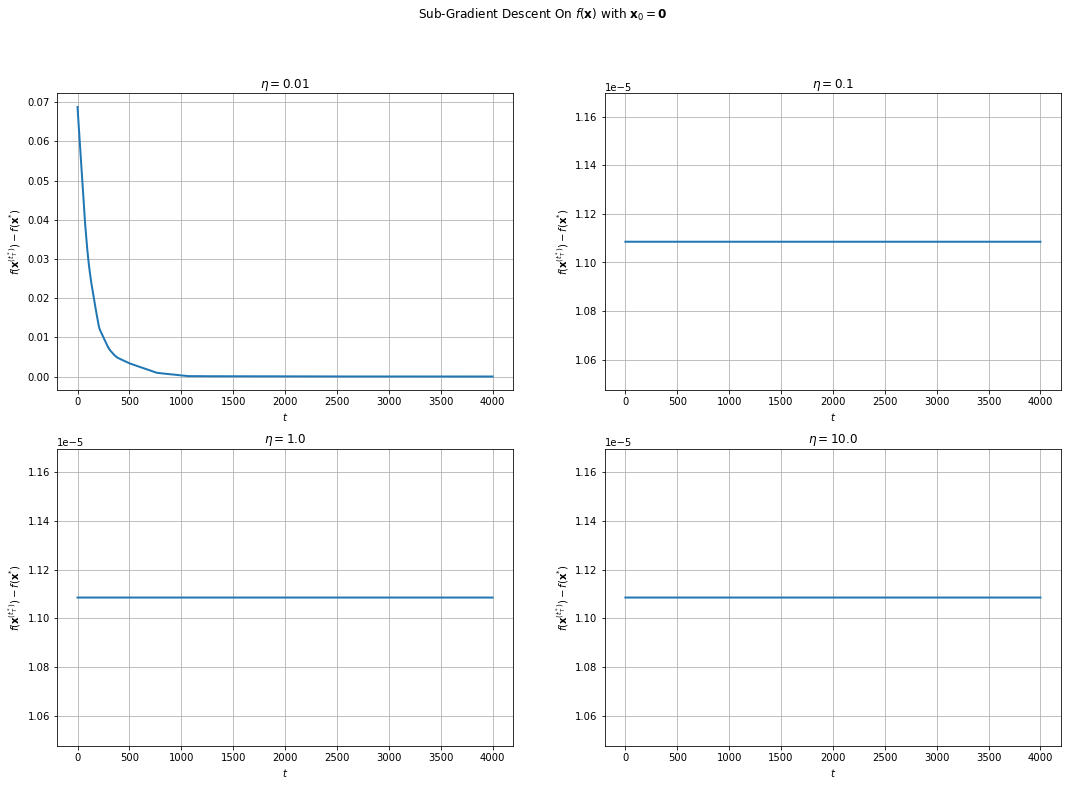

In [34]:

x0 = np.zeros(n)          # Initial value
f0 = obj_func(x0, A, B)

difference = []      # saves minimum between f(x) and f0 for every x from the begining of the algorithm until current step
eta = np.array([0.01, 0.1, 1, 10])

plt.figure(figsize = (18,12))
for i in range(eta.size):
    x_new = x0
    difference = []
    for t in range(T+1):
        
        f_xnew = obj_func(x_new, A, B)
        f0 = np.min((f_xnew, f0))
        x_new -= eta[i]*subgrad(x_new, A, B)
        difference.append(f0 - obj_func(x_opt, A, B))     #f(x(t*)-f(x*))

    plt.subplot(int(np.ceil(np.sqrt(eta.size))), int(np.ceil(np.sqrt(eta.size))), i + 1)
    plt.plot(np.arange(T + 1), difference, linewidth=2)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$f(\mathbf{x}^{(t^*_T)}) - f(\mathbf{x}^{*})$')
    plt.title(r'$\eta = ${eta}'.format(eta=eta[i]))
    plt.grid(True)

plt.suptitle(r'Sub-Gradient Descent On $f(\mathbf{x})$ with $\mathbf{x}_0 = \mathbf{0}$')
plt.show()       
    

# Part 5:

# Q3:

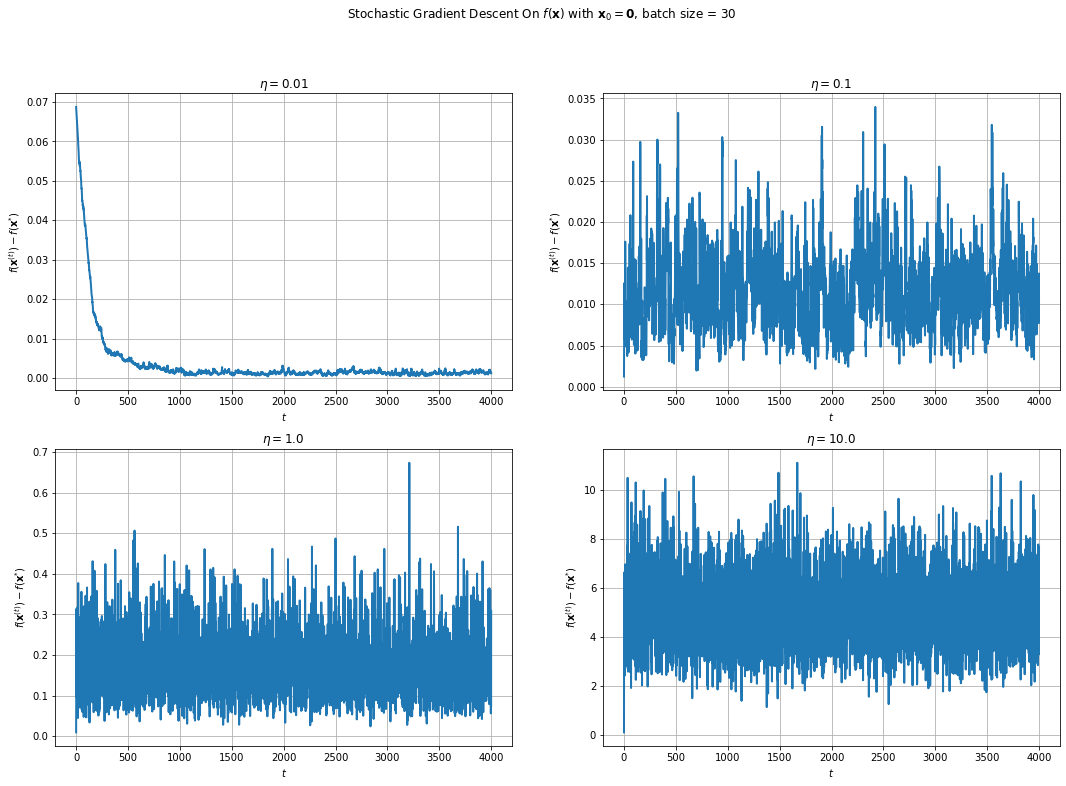

In [35]:

batch_size = 30
T  = 4000
x0  = np.zeros(n)
eta = np.array([0.01, 0.1, 1, 10])
# Implementing Stochastic_Gradient_Decent algorithm:

plt.figure(figsize = (18, 12))

for i in range (eta.size):
    x_new = x0
    lst = []
    for j in range(T+1):
        
        diff = obj_func(x_new, A, B)-obj_func(x_opt, A, B)
        lst.append(diff) 
        random_samples = np.random.choice(m, batch_size)
        
        # choose a random sample set from dataset
        
        A_t = A[random_samples, :]
        B_t = B[random_samples]
        V_t = subgrad(x_new, A_t, B_t)  # random subgradient where expected value of V_T belongs to the subgradient of f(X_t)
        x_new -= eta[i]*V_t
        
    plt.subplot(int(np.ceil(np.sqrt(eta.size))), int(np.ceil(np.sqrt(eta.size))), i + 1)
    plt.plot(np.arange(T + 1), lst, linewidth=2)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$f(\mathbf{x}^{(t)}) - f(\mathbf{x}^{*})$')
    plt.title(r'$\eta = ${eta}'.format(eta=eta[i]))
    plt.grid(True)
    
plt.suptitle(r'Stochastic Gradient Descent On $f(\mathbf{x})$ with $\mathbf{x}_0 = \mathbf{0}$, batch size = $30$')
plt.show()


# Q4:

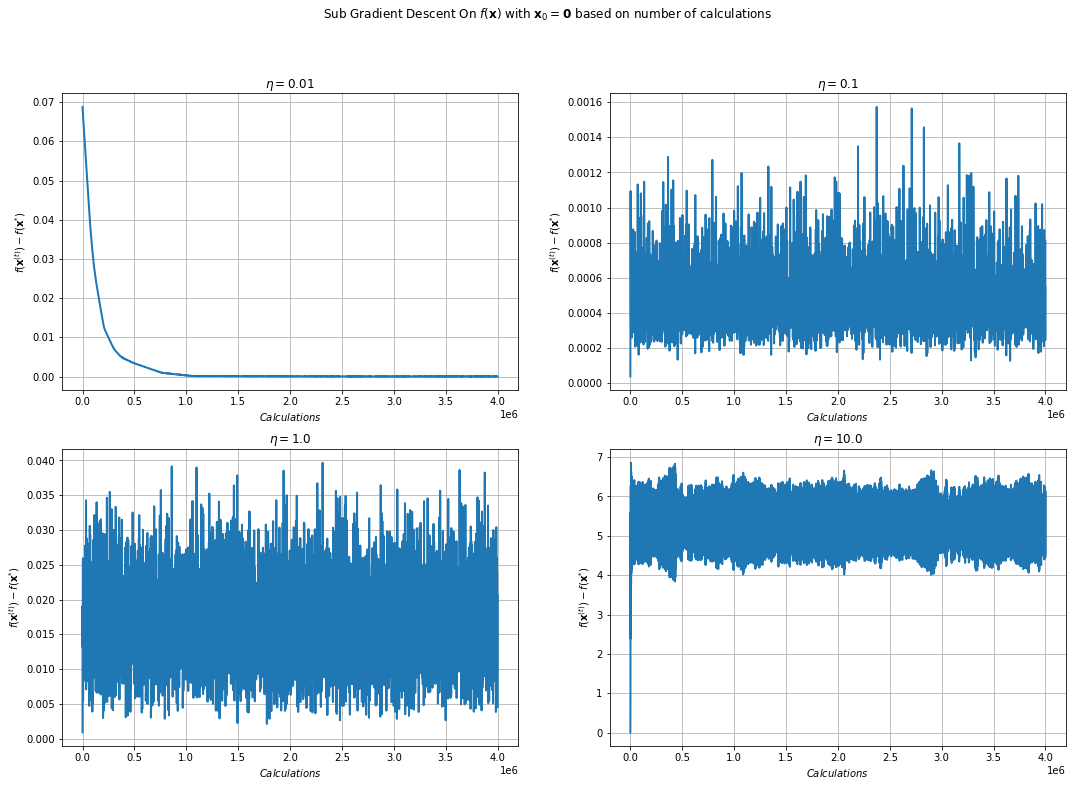

In [36]:
# These calculations are for sub-gradient descent:

T   = 4000
x0  = np.zeros(n)
eta = np.array([0.01, 0.1, 1, 10])
calc = m*n*np.arange(T+1)       # Number of calucations for subgradient descent algorithm in T repetitions

# Implementing Sub_Gradient_Decent algorithm:

plt.figure(figsize = (18, 12))

for i in range (eta.size):
    x_new = x0
    lst = []
    for j in range(T+1):
        
        diff = obj_func(x_new, A, B)-obj_func(x_opt, A, B)
        lst.append(diff) 
        x_new -= eta[i]*subgrad(x_new, A, B)
        
    plt.subplot(int(np.ceil(np.sqrt(eta.size))), int(np.ceil(np.sqrt(eta.size))), i + 1)
    plt.plot(calc, lst, linewidth=2)
    plt.xlabel(r'$Calculations$')
    plt.ylabel(r'$f(\mathbf{x}^{(t)}) - f(\mathbf{x}^{*})$')
    plt.title(r'$\eta = ${eta}'.format(eta=eta[i]))
    plt.grid(True)
    
plt.suptitle(r'Sub Gradient Descent On $f(\mathbf{x})$ with $\mathbf{x}_0 = \mathbf{0}$ based on number of calculations')
plt.show()


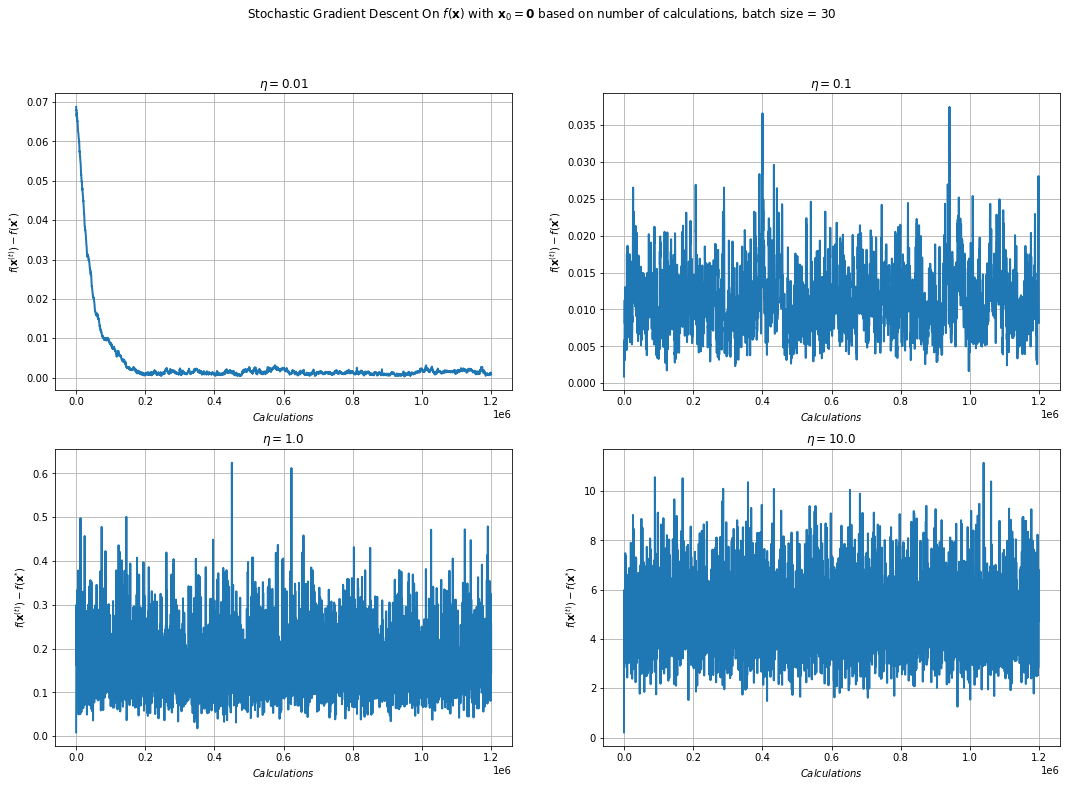

In [37]:
# These calculations are for stochastic-gradient descent:

batch_size = 30
T  = 4000
x0  = np.zeros(n)
calc = (batch_size)*n*np.arange(T+1)      # Number of calucations for stochastic gradient descent algorithm in T repetitions      
eta = np.array([0.01, 0.1, 1, 10])

# Implementing Stochastic_Gradient_Decent algorithm:

plt.figure(figsize = (18, 12))

for i in range (eta.size):
    x_new = x0
    lst = []
    for j in range(T+1):
        
        diff = obj_func(x_new, A, B)-obj_func(x_opt, A, B)
        lst.append(diff) 
        random_samples = np.random.choice(m, batch_size)
        
        # choose a random sample set from dataset
        
        A_t = A[random_samples, :]
        B_t = B[random_samples]
        V_t = subgrad(x_new, A_t, B_t)  # random subgradient where expected value of V_T belongs to the subgradient of f(X_t)
        x_new -= eta[i]*V_t
        
    plt.subplot(int(np.ceil(np.sqrt(eta.size))), int(np.ceil(np.sqrt(eta.size))), i + 1)
    plt.plot(calc, lst, linewidth=2)
    plt.xlabel(r'$Calculations$')
    plt.ylabel(r'$f(\mathbf{x}^{(t)}) - f(\mathbf{x}^{*})$')
    plt.title(r'$\eta = ${eta}'.format(eta=eta[i]))
    plt.grid(True)
    
plt.suptitle(r'Stochastic Gradient Descent On $f(\mathbf{x})$ with $\mathbf{x}_0 = \mathbf{0}$ based on number of calculations, batch size = $30$')
plt.show()






# Part 6:

# Q5:

In [39]:

house_data = pd.read_csv('house_data.csv')
house_data


,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
0,152,1,3,3,0,0,0,0,1,9.816540e+05
1,142,1,2,23,0,0,1,0,0,8.702843e+05
2,64,1,2,26,0,0,0,0,1,5.158686e+05
3,156,2,3,37,0,0,0,0,1,9.796559e+05
4,121,4,2,24,0,0,1,0,0,8.594536e+05
...,...,...,...,...,...,...,...,...,...,...
995,190,1,1,13,1,0,0,0,0,1.108927e+06
996,172,2,2,49,0,0,0,1,0,1.072469e+06
997,111,4,1,10,0,1,0,0,0,8.400289e+05
998,81,4,2,44,0,0,0,1,0,6.396662e+05


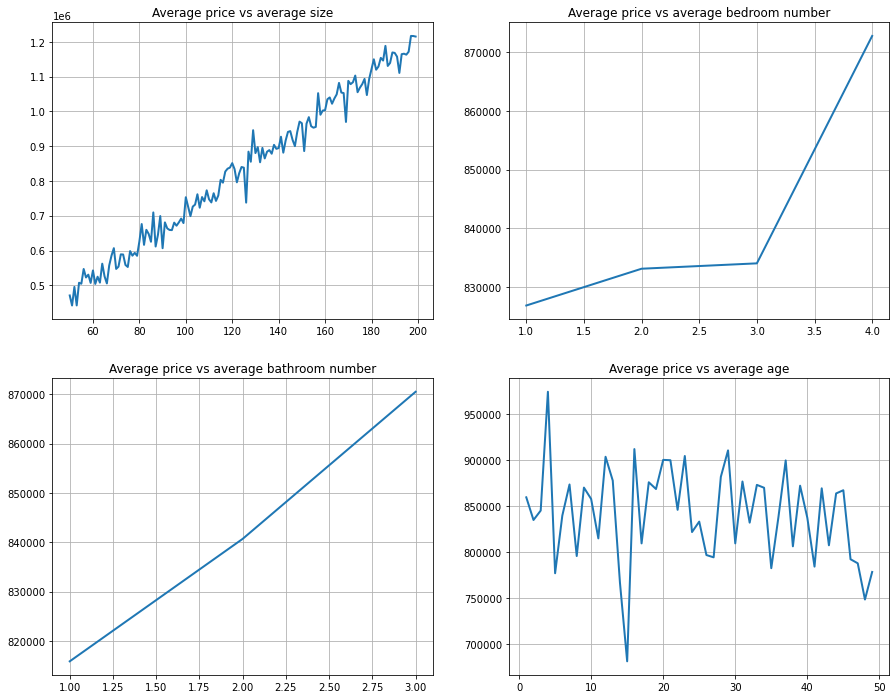

In [40]:
# Calculating average price based on features

avg_price1 = (house_data.groupby(by='size').mean()['price'])
avg_price2 = (house_data.groupby(by='bedrooms').mean()['price'])
avg_price3 = (house_data.groupby(by='bathrooms').mean()['price'])
avg_price4 = (house_data.groupby(by='age').mean()['price'])

# Plotting Prices versus different features

figure = plt.figure(figsize=(15, 12))

ax1 = figure.add_subplot(2, 2, 1)
ax1.plot(avg_price1.index,avg_price1, linewidth = 2)
ax1.set_title('Average price vs average size')
ax1.grid(True)

ax2 = figure.add_subplot(2, 2, 2)
ax2.plot(avg_price2.index,avg_price2, linewidth = 2)
ax2.set_title('Average price vs average bedroom number')
ax2.grid(True)

ax3 = figure.add_subplot(2, 2, 3)
ax3.plot(avg_price3.index,avg_price3, linewidth = 2)
ax3.set_title('Average price vs average bathroom number')
ax3.grid(True)

ax4 = figure.add_subplot(2, 2, 4)
ax4.plot(avg_price4.index,avg_price4, linewidth = 2)
ax4.set_title('Average price vs average age')
ax4.grid(True)


# Q6:


In [41]:
# Splitting the data to train and test

sampled_house_data = house_data.sample(frac=1).to_numpy()       # we shuffle data using sample function

ratio = 0.75
total_rows = sampled_house_data.shape[0]
train_size = int(total_rows*ratio)
train_data = sampled_house_data[:train_size, :]       # This would be the training data
test_data  = sampled_house_data[train_size:, :]       # This would be the test data


train_x = train_data[:, :-1]
train_y = train_data[:, -1].reshape(-1, 1)
test_x = test_data[:, :-1]
test_y = test_data[:, -1].reshape(-1, 1)

# Normalizing train data
train_x_means = train_x.mean(axis=0)
train_x_stds = train_x.std(axis=0)
train_y_means = train_y.mean(axis=0)
train_y_stds = train_y.std(axis=0)

train_x_normalized = (train_x - train_x_means) / train_x_stds
train_y_normalized = (train_y - train_y_means) / train_y_stds

test_x_normalized = (test_x - train_x_means) / train_x_stds
test_y_normalized = (test_y - train_y_means) / train_y_stds


# Q7:

In [42]:
# Function below calculates MSE:

def MSE_Calculator(X, y, w, b):
    m, n = X.shape
    one = np.ones((m, 1))
    y_hat = X @ w + b * one
    mse = ((y-y_hat)**2).sum()
    return mse / m


# Q8 & Q9:

In [43]:

def SGD(X, y, w, b, lr=1e-3):
    m, n = X.shape
    one = np.ones((m, 1))
    # Calculate gradients
    
    w_grad = 2*X.T @ X @ w + 2*b * X.T @ one - 2*X.T @ y
    b_grad = 2*one.T @ X @ w + 2*b* one.T @ one - 2*one.T @ y
    
    w = w - lr * w_grad
    b = b - lr * b_grad
    
    return w, b


In [44]:

def iteration(X, y, w, b, batch_size=64, lr=1e-3):
    m, n = X.shape
    index_mirror = np.random.permutation(range(m))
    index = 0
    while index < m:
        batch_x = X[index_mirror[index: index + batch_size], :]
        batch_y = y[index_mirror[index: index + batch_size], :]
        w, b = SGD(batch_x, batch_y, w, b, lr=lr)
        index += batch_size
    
    return w, b


In [45]:

NUM_EPOCHS = 30
LEARNING_RATE = 1e-4
BATCH_SIZE = 64

train_errors = []
test_errors = []

m, n = train_x.shape

# Initialize model parameters

w = np.random.rand(n, 1)
b = np.random.rand(1)

for epoch in range(1, NUM_EPOCHS+1):
    w, b = iteration(
        X=train_x_normalized,
        y=train_y_normalized,
        w=w,
        b=b,
        batch_size=BATCH_SIZE,
        lr=LEARNING_RATE
    )
    mse_train = MSE_Calculator(train_x_normalized, train_y_normalized, w, b)
    mse_test = MSE_Calculator(test_x_normalized, test_y_normalized, w, b)
    train_errors.append(mse_train)
    test_errors.append(mse_test)
    print(f'epoch {epoch}, train mse: {np.round(mse_train, 3)}, test mse: {np.round(mse_test, 3)}')
    print()
    

epoch 1, train mse: 0.666, test mse: 0.541

epoch 2, train mse: 0.494, test mse: 0.401

epoch 3, train mse: 0.37, test mse: 0.301

epoch 4, train mse: 0.281, test mse: 0.229

epoch 5, train mse: 0.217, test mse: 0.177

epoch 6, train mse: 0.17, test mse: 0.14

epoch 7, train mse: 0.136, test mse: 0.113

epoch 8, train mse: 0.112, test mse: 0.094

epoch 9, train mse: 0.094, test mse: 0.08

epoch 10, train mse: 0.081, test mse: 0.07

epoch 11, train mse: 0.071, test mse: 0.063

epoch 12, train mse: 0.064, test mse: 0.058

epoch 13, train mse: 0.059, test mse: 0.055

epoch 14, train mse: 0.056, test mse: 0.052

epoch 15, train mse: 0.053, test mse: 0.05

epoch 16, train mse: 0.051, test mse: 0.049

epoch 17, train mse: 0.05, test mse: 0.048

epoch 18, train mse: 0.049, test mse: 0.048

epoch 19, train mse: 0.048, test mse: 0.047

epoch 20, train mse: 0.047, test mse: 0.047

epoch 21, train mse: 0.047, test mse: 0.047

epoch 22, train mse: 0.046, test mse: 0.047

epoch 23, train mse: 0.046

Text(0, 0.5, 'MSE')

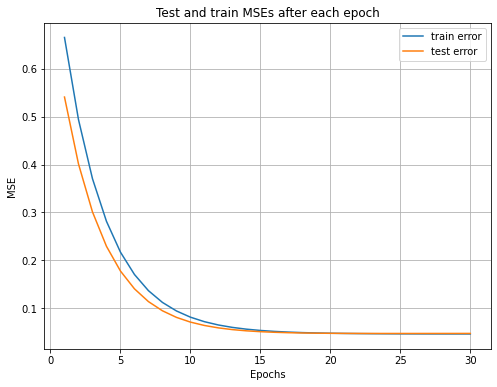

In [46]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(1, NUM_EPOCHS+1), train_errors, label='train error')
ax.plot(range(1, NUM_EPOCHS+1), test_errors, label='test error')
ax.legend();
ax.grid(True)
ax.set_title('Test and train MSEs after each epoch')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')